In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# 确保matplotlib能够显示中文
mpl.rcParams["font.sans-serif"] = ["Microsoft YaHei"]
# 确保matplotlib能够正常显示负号
mpl.rcParams["axes.unicode_minus"] = False
from mpl_toolkits import mplot3d

In [2]:
# 加载训练数据集
tds = np.loadtxt('dataset_一元线性回归.csv', delimiter=',', dtype='int', skiprows=1)
tds_x = tds[:,0]
tds_y = tds[:,1]
tds_x_mean = tds_x.mean()
tds_x_std = tds_x.std()
# 标准化

std_tds_x = (tds_x - tds_x_mean) / tds_x_std

train_x = np.vstack([np.ones(std_tds_x.shape[0]), std_tds_x, np.power(std_tds_x, 2)]).T
train_x

array([[ 1.        ,  1.39433428,  1.94416809],
       [ 1.        ,  1.11069026,  1.23363286],
       [ 1.        ,  0.09554325,  0.00912851],
       [ 1.        , -1.59139223,  2.53252924],
       [ 1.        , -0.8449606 ,  0.71395842],
       [ 1.        ,  0.93154667,  0.8677792 ],
       [ 1.        , -1.38239138,  1.91100592],
       [ 1.        , -1.74067856,  3.02996185],
       [ 1.        ,  0.46875906,  0.21973506],
       [ 1.        ,  0.73747445,  0.54386856],
       [ 1.        , -0.11345761,  0.01287263],
       [ 1.        , -0.63595975,  0.4044448 ],
       [ 1.        , -0.36724436,  0.13486842],
       [ 1.        , -0.44188752,  0.19526458],
       [ 1.        ,  0.3045441 ,  0.09274711],
       [ 1.        ,  1.94669369,  3.78961632],
       [ 1.        ,  0.25975821,  0.06747433],
       [ 1.        ,  0.25975821,  0.06747433],
       [ 1.        , -1.23310505,  1.52054807],
       [ 1.        ,  0.84197488,  0.70892169]])

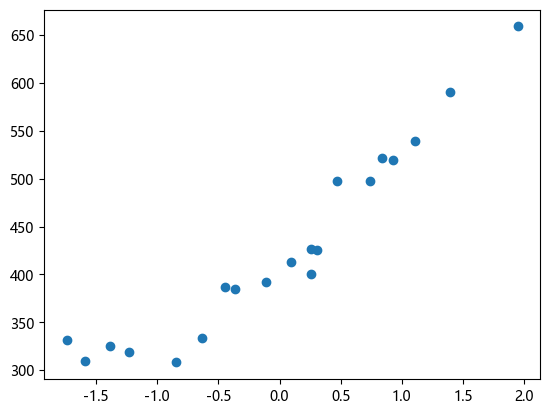

In [3]:
# 适用训练数据集绘制散点图看数据分布
plt.scatter(std_tds_x, tds_y)

In [4]:
# 拟合直线函数
def f(theta, x):
    return np.dot(x, theta.T)

# 成本函数
def J(theta, train_x, tds_y):
    m = len(train_x)
    return np.sum(np.power(f(theta, train_x) - tds_y, 2)) / 2 / m

# 下面两个是偏导数
def pd_theta(theta, train_x, tds_y):
    m = len(train_x)
    return np.dot((f(theta, train_x) - tds_y), train_x) / m

In [5]:
eta = 5e-2
theta = np.array([0, 0, 0])
lst_iter_cnt = []
lst_cost = []
print(f(theta, train_x) - tds_y)
j_cost_cur = J(theta, train_x, tds_y)
for i in range(500):
    j_cost_pre = j_cost_cur
    tmp_theta = theta - eta * pd_theta(theta, train_x, tds_y)
    
    theta = tmp_theta
    
    j_cost_cur = J(theta, train_x, tds_y)
    
    lst_iter_cnt.append(i)
    lst_cost.append(j_cost_cur)
    
    print(i, theta, lst_cost[i])

[-591. -539. -413. -310. -308. -519. -325. -332. -498. -498. -392. -334.
 -385. -387. -425. -659. -400. -427. -319. -522.]
0 [21.4575      4.6739384  22.48917832] 78437.80143237676
1 [40.71766608  9.19217132 41.47214189] 64351.225930559005
2 [58.06567569 13.55032466 57.4401186 ] 53562.644170587635
3 [73.74788597 17.74594655 70.81655719] 45245.90150544066
4 [87.97716381 21.77817623 81.96645746] 38785.18499246331
5 [100.93748275  25.64746177  91.20441668] 33721.234006423
6 [112.78788778  29.35531986  98.80156866] 29711.324873892212
7 [123.66591496  32.90413162 104.991568  ] 26499.500718101033
8 [133.69054081  36.29696943 109.97575081] 23894.421914354516
9 [142.96472623  39.53745027 113.92758526] 21752.88506035749
10 [151.57761065  42.62961185 116.99650965] 19967.55854026884
11 [159.60640464  45.57780824 119.3112423 ] 18457.85476694032
12 [167.11802229  48.3866222  120.98263595] 17163.13586778038
13 [174.17048938  51.06079178 122.10613932] 16037.655363543856
14 [180.81415794  53.60514914 

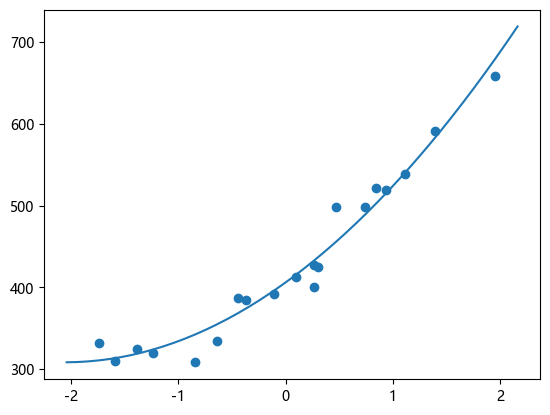

In [6]:
plt.scatter(std_tds_x, tds_y)
x = np.arange(np.min(std_tds_x)-0.3, np.max(std_tds_x)+0.3, 0.1)
y = f(theta, np.vstack([np.ones(x.shape[0]), x, np.power(x, 2)]).T)
plt.plot(x, y)

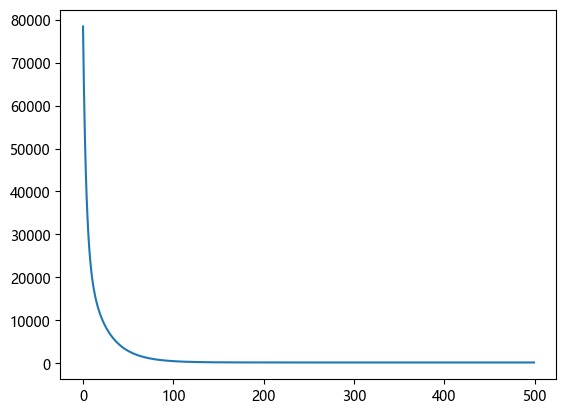

In [7]:
plt.plot(lst_iter_cnt, lst_cost)

In [8]:
# 以下的公式推导比较麻烦，带入可得，但是随着项数的增多，不是很好求
theta_not_scaled = np.array([
    theta[0] - theta[1] * tds_x.mean() / tds_x.std() + theta[2] * tds_x.mean() ** 2 / tds_x.std() ** 2,
    theta[1] / tds_x.std() - 2 * theta[2] * tds_x.mean() / tds_x.std() ** 2,
    theta[2] / tds_x.std() ** 2
])


def f_not_scaled(theta_not_scaled, x):
    return np.dot([1, x, x**2], theta_not_scaled.T)

print("x为198时，y的预测值：", f_not_scaled(theta_not_scaled, 198))

x为198时，y的预测值： 502.47731266313366


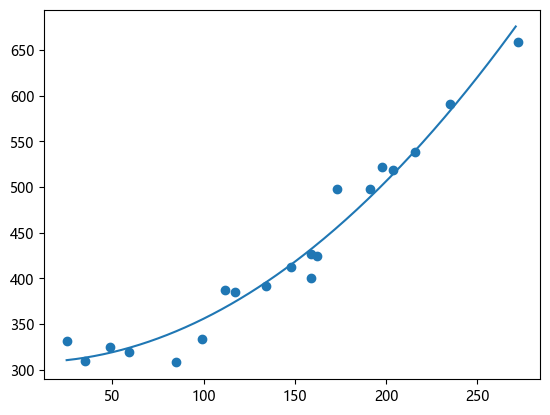

In [9]:
plt.scatter(tds_x, tds_y)
x = np.arange(np.min(tds_x), np.max(tds_x), 1)

def f_not_scaled2(theta_not_scaled, x):
    return np.dot(x, theta_not_scaled.T)

y = f_not_scaled2(theta_not_scaled, np.vstack([np.ones(x.size), x, np.power(x, 2)]).T)

plt.plot(x, y)